<a href="https://colab.research.google.com/github/umairiqbal78/Deep-learning-examples/blob/master/Beautiful_and_average_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

!pwd
#!ls -ahl drive/My\ Drive|grep dogs
!unzip "/content/drive/My Drive/beautiful_and_average_dataset/archive.zip" 
#sourceZipFile = "drive/My Drive/dogs-vs-cats.zip"
#print(os.path.exists(sourceZipFile))

Streaming output truncated to the last 5000 lines.
  inflating: consolidated/beautiful/1915.jpg  
  inflating: consolidated/beautiful/1916.jpg  
  inflating: consolidated/beautiful/1917.jpg  
  inflating: consolidated/beautiful/1918.jpg  
  inflating: consolidated/beautiful/1919.jpg  
  inflating: consolidated/beautiful/1920.jpg  
  inflating: consolidated/beautiful/1921.jpg  
  inflating: consolidated/beautiful/1922.jpg  
  inflating: consolidated/beautiful/1923.jpg  
  inflating: consolidated/beautiful/1924.jpg  
  inflating: consolidated/beautiful/1925.jpg  
  inflating: consolidated/beautiful/1926.jpg  
  inflating: consolidated/beautiful/1927.jpg  
  inflating: consolidated/beautiful/1928.jpg  
  inflating: consolidated/beautiful/1929.jpg  
  inflating: consolidated/beautiful/1930.jpg  
  inflating: consolidated/beautiful/1931.jpg  
  inflating: consolidated/beautiful/1932.jpg  
  inflating: consolidated/beautiful/1933.jpg  
  inflating: consolidated/beautiful/1934.jpg  
  inflati

In [10]:
train_dir = "/content/drive/My Drive/beautiful_and_average_dataset/train"
val_dir = "/content/drive/My Drive/beautiful_and_average_dataset/valid"
test_dir = "/content/drive/My Drive/beautiful_and_average_dataset/test"

In [11]:
validation_beautiful_dir = "/content/drive/My Drive/beautiful_and_average_dataset/valid/beautiful"
validation_average_dir = "/content/drive/My Drive/beautiful_and_average_dataset/valid/average"

In [12]:
train_beautiful_dir = "/content/drive/My Drive/beautiful_and_average_dataset/train/beautiful"
train_average_dir = "/content/drive/My Drive/beautiful_and_average_dataset/train/average"

In [13]:
test_beautiful_dir = "/content/drive/My Drive/beautiful_and_average_dataset/test/beautiful"
test_average_dir = "/content/drive/My Drive/beautiful_and_average_dataset/test/average"

In [16]:
print('total validation_beautiful_images:', len(os.listdir(validation_beautiful_dir)))
print('total validation_average_images:', len(os.listdir(validation_average_dir)))
print('total  train_beautiful_images:', len(os.listdir(train_beautiful_dir)))
print('total train_average_images:', len(os.listdir(train_average_dir)))
print('total test_beautiful_images:', len(os.listdir(test_beautiful_dir)))
print('total test_average_images:', len(os.listdir(test_beautiful_dir)))


total validation_beautiful_images: 150
total validation_average_images: 150
total  train_beautiful_images: 2000
total train_average_images: 2000
total test_beautiful_images: 150
total test_average_images: 150


In [ ]:
#Baseline Model 
from tensorflow.keras import datasets, layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [19]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    val_dir,target_size=(150, 150),
    batch_size=3,
    class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
label_batch 1.0


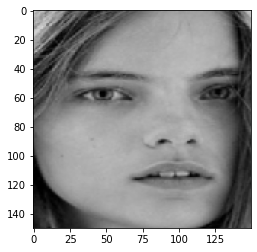

1
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
label_batch 0.0


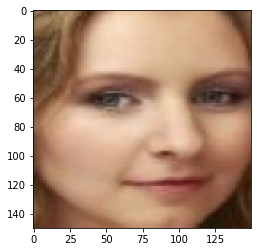

2
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
label_batch 0.0


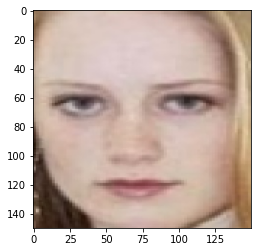

3
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
label_batch 0.0


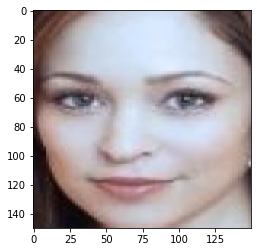

4
4


In [22]:
#testing
#print(type(train_generator))
import matplotlib.pyplot as plt

counter =0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print("label_batch",labels_batch[counter])
    plt.imshow(data_batch[counter])
    
    plt.show()
    counter += 1
    print(counter)
    if counter > 3:
        break
print(counter)  

# label == 0 (average)
# label == 1 (beautiful)

In [23]:
import pickle

modelStoragePath = "/content/drive/My Drive/beautiful_and_average_dataset"

def saveData(model, history, iteration):
    modelFile = modelStoragePath + "model_beautiful_vs_avg" + str(iteration).strip() + ".h5"
    historyFile = modelStoragePath + "_History_beautiful_vs_avg" + str(iteration).strip() + ".pkle"
    model.save(modelFile)
    #saving history file too
    with open(historyFile, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
    return modelFile, historyFile

import tensorflow.keras.models
def loadData(iteration):
    modelFile = modelStoragePath + "model_beautiful_vs_avg" + str(iteration).strip() + ".h5"
    historyFile = modelStoragePath + "_History_beautiful_vs_avg" + str(iteration).strip() + ".pkle"
    model = models.load_model(modelFile)
    with open(historyFile, 'rb') as file_pi:
        history = pickle.load(file_pi)
    return model, history

In [ ]:
print(type(history))
modelFile, HistoryFile = saveData(model, history, iteration=1)
print(modelFile, HistoryFile, "Saved")

<class 'tensorflow.python.keras.callbacks.History'>
/content/drive/My Drive/beautiful_and_average_datasetmodel_beautiful_vs_avg1.h5 /content/drive/My Drive/beautiful_and_average_dataset_History_beautiful_vs_avg1.pkle Saved


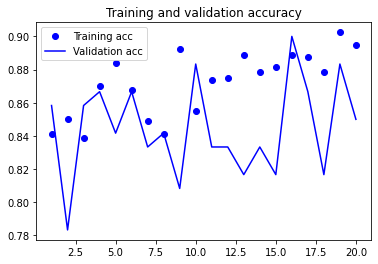

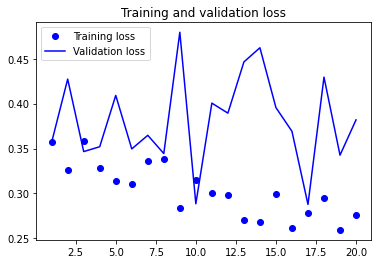

In [ ]:
#model, history = loadData(iteration = 1)

#Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [17]:
from tensorflow.keras import datasets, layers, models, optimizers
#Denser Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [24]:
#Listing 5.8 Fitting the model using a batch generator
#Please use Model.fit, which supports generators.
batch_size_train = 20
batch_size_valid = 6
history = model.fit(
    train_generator,
    steps_per_epoch=int(2000/batch_size_train),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=int(300/batch_size_valid))

modelFile, HistoryFile = saveData(model, history, iteration=1)
print(modelFile, HistoryFile, "Saved")

Epoch 1/20
100/100 [==============================] - 475s 5s/step - loss: 0.6622 - acc: 0.6090 - val_loss: 0.6214 - val_acc: 0.5867
Epoch 2/20
100/100 [==============================] - 236s 2s/step - loss: 0.5358 - acc: 0.7355 - val_loss: 0.4674 - val_acc: 0.8067
Epoch 3/20
100/100 [==============================] - 123s 1s/step - loss: 0.4759 - acc: 0.7845 - val_loss: 0.4293 - val_acc: 0.8067
Epoch 4/20
100/100 [==============================] - 90s 902ms/step - loss: 0.4390 - acc: 0.8040 - val_loss: 0.4316 - val_acc: 0.8133
Epoch 5/20
100/100 [==============================] - 86s 856ms/step - loss: 0.4241 - acc: 0.8060 - val_loss: 0.4279 - val_acc: 0.8133
Epoch 6/20
100/100 [==============================] - 78s 784ms/step - loss: 0.3956 - acc: 0.8305 - val_loss: 0.4839 - val_acc: 0.8000
Epoch 7/20
100/100 [==============================] - 76s 763ms/step - loss: 0.3669 - acc: 0.8490 - val_loss: 0.3806 - val_acc: 0.8200
Epoch 8/20
100/100 [==============================] - 76s 756

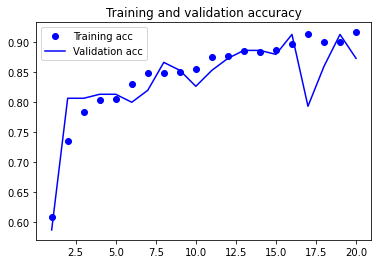

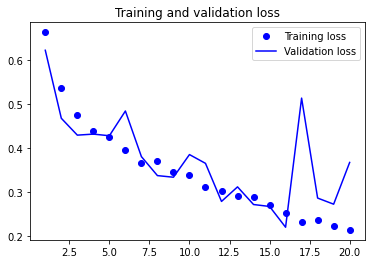

In [25]:
#model, history = loadData(iteration = 1)

#Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
